<a href="https://colab.research.google.com/github/christophermalone/stat360/blob/main/Handout10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handout #10 : The "Leave-One-Out" Concept, i.e. Jackknife

## Load Tidyverse

The tidyverse R package will be used to assist with reading in the dataset into the current R session.

In [1]:
#@title Load Tidyverse
#load tidyverse package
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()





---




## Simple Case: "Leave-One-Out" for a Mean

Let's suppose we have a simple data vector, say $\bf{y}$.

$$\bf{y} = \begin{bmatrix}
2 \\
3 \\
5 \\
8 \\
10 \\
\end{bmatrix}$$


Putting this vector into R.

In [2]:
y <- c(2, 3, 5, 8, 10)

Next, getting the mean of $\bf{y}$ using the mean() function.

In [3]:
mean(y)

[1] 5.6

The minus argument can be used to *temporarily* withhold an observation from calculations done on an object.  For example, the following will calculate the mean of y without the $1^{st}$ observation.  


In [11]:
#What does y look like without the 1st observation
cat("y vector without 1st observation: ")
y[-1]

cat("\n")

#Getting the mean of y without the 1st observation
cat("Mean of y without 1st observation:")
mean( y[-1] )

y vector without 1st observation: 

[1]  3  5  8 10


Mean of y without 1st observation:

[1] 6.5

Next, continue by removing the $2^{nd}$ observation from consideration.

In [12]:
#What does y look like without the 2nd observation
cat("y vector without 2nd observation: ")
y[-2]

cat("\n")

#Getting the mean of y without the 1st observation
cat("Mean of y without 2nd observation:")
mean( y[-2] )

y vector without 2nd observation: 

[1]  2  5  8 10


Mean of y without 2nd observation:

[1] 6.25

Continue with remaining observations.

In [13]:
#Getting the mean of y without the 3rd observation
cat("Mean of y without 3rd observation:")
mean( y[-3] )

cat("\n")

#Getting the mean of y without the 4th observation
cat("Mean of y without 4th observation:")
mean( y[-4] )

cat("\n")

#Getting the mean of y without the 5th observation
cat("Mean of y without 5th observation:")
mean( y[-5] )

Mean of y without 3rd observation:

[1] 5.75


Mean of y without 4th observation:

[1] 5


Mean of y without 5th observation:

[1] 4.5

## Leave-One-Out Algorithm for a Mean

Step 1: Create an output vector to hold the outcomes from the algorithm

In [15]:
output = rep(0,5)
output

[1] 0 0 0 0 0

Step #2:  Use a for() loop to cycle through for each of the five observations


In [18]:
for(i in 1:5){
               output[i] = mean( y[-i] )
             }

cat("Output vector after for() loop: ")
output

Output vector after for() loop: 

[1] 6.50 6.25 5.75 5.00 4.50

### Writing your own function for the "Leave-One-Out" Method

Consider the following code that will create a function in R.  A function is simply a collection of code.  A well-written function allows your code to be more flexibility and have increased functionality.

A function in R should:

*   Have a good name
*   Have clearly defined chunks of code with comments
*   Return something
*   Often functions contain input arguments



In [19]:
#A custom function which has name mean.jackknife
#This function take one input argument, y
#This function returns a vector of the jackknife mean

mean.jackknife = function(y){
    
    #Find the length of y
    n = length(y)
    
    #Setup output vector
    output = rep(0,n)
    
    #Loop for iterations
    for(i in 1:n){
        output[i] = mean( y[-i])
    }
    
    #Return the output vector
    return(output)

}

Next, let's use our custom function to obtain the jackknife mean of the vector $\bf{y}$.

In [20]:
mean.jackknife(y)

[1] 6.50 6.25 5.75 5.00 4.50

## DFBETA Algorithm

Step 1: Create an empty data.frame to hold the outcomes from the algorithm

In [ ]:
DFBETA_Outcomes <-data.frame(rowid=numeric(), yintercept = numeric(), slope = numeric(), rmse = numeric())

Step 2: Fit a model -- removing one observation at a time, put outcomes into  data.frame

In [ ]:
for(i in 1:65){
  model_i <- lm(Price ~ Age, data=FordFocus[-c(i), ])
  DFBETA_Outcomes[i,1] <- i
  DFBETA_Outcomes[i,2] <- model_i$coefficients[1]
  DFBETA_Outcomes[i,3] <- model_i$coefficients[2]
  DFBETA_Outcomes[i,4] <- sigma(model_i)
}

Step 3: Compute the change in y-intercept and slope for each observation removed

In [ ]:
DFBETA_Outcomes <- (DFBETA_Outcomes
                      %>% mutate(
                                  DFBeta_yint = (14421.6 - yintercept),
                                  DFBeta_slope = (931.8 - slope)
                                )
                   )

Step 4: Sort by the most change in the slope (or yintercept)

In [ ]:
 (DFBETA_Outcomes
   %>% arrange(desc(abs(DFBeta_slope)))
   %>% head()
 )

,rowid,yintercept,slope,rmse,DFBeta_yint,DFBeta_slope
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,65,14980.85,1073.9707,2707.428,-559.2487,-142.17067
2,8,14183.96,902.8605,2749.587,237.6436,28.93947
3,12,14168.84,904.8896,2681.682,252.7647,26.91036
4,13,14168.84,904.8896,2681.682,252.7647,26.91036
5,11,14171.12,905.1334,2685.008,250.4790,26.66664
6,9,14219.04,907.1395,2780.375,202.5564,24.66053


Creating an index plot for the Change in Slope

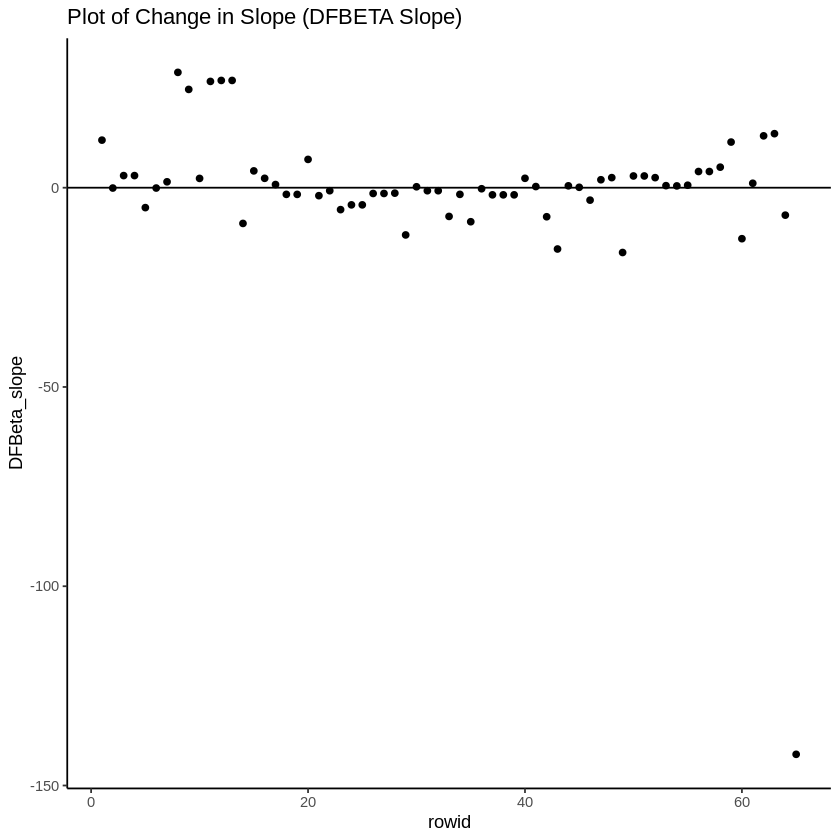

In [ ]:
ggplot(data=DFBETA_Outcomes, aes(x=rowid,y=DFBeta_slope)) + 
  geom_point() + 
  ggtitle("Plot of Change in Slope (DFBETA Slope)") + 
  geom_hline(yintercept=0) +
  theme_classic()

End of Document